In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
#remove unnecesary columns and personal data
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1

In [4]:
#Check number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Geography    3
Gender       2
dtype: int64

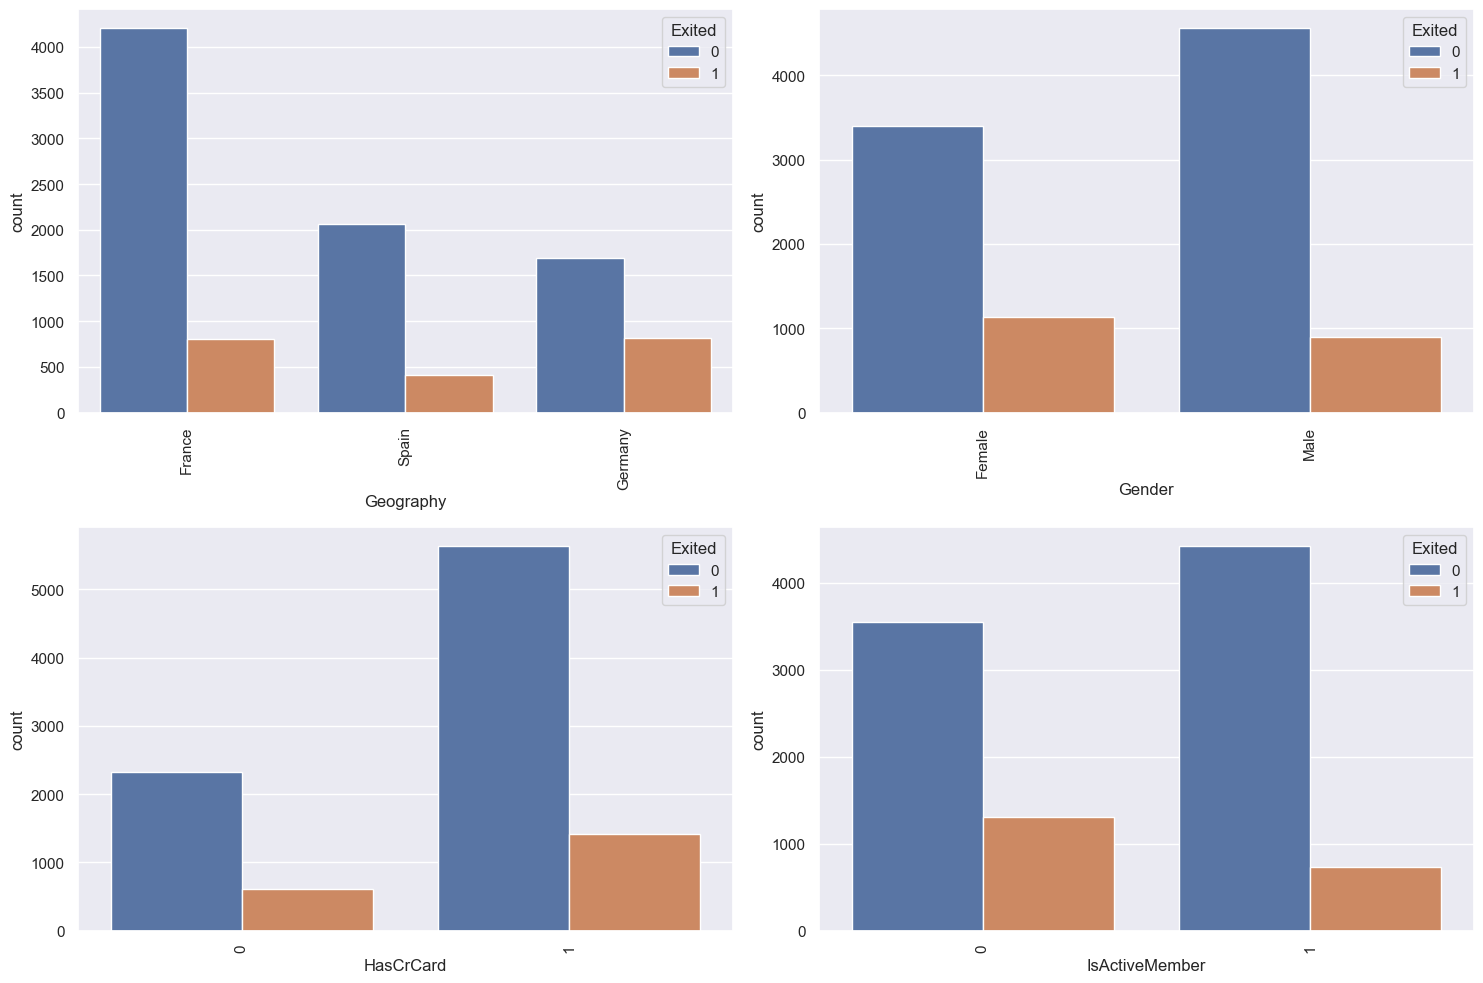

In [5]:
#Exploratory Data Analysis
#List of categorical variables to plot
cat_vars = ['Geography', 'Gender', 'HasCrCard','IsActiveMember']

#create fig with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

#create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Exited', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

    #adjust spacing between subplots
fig.tight_layout()

plt.show()

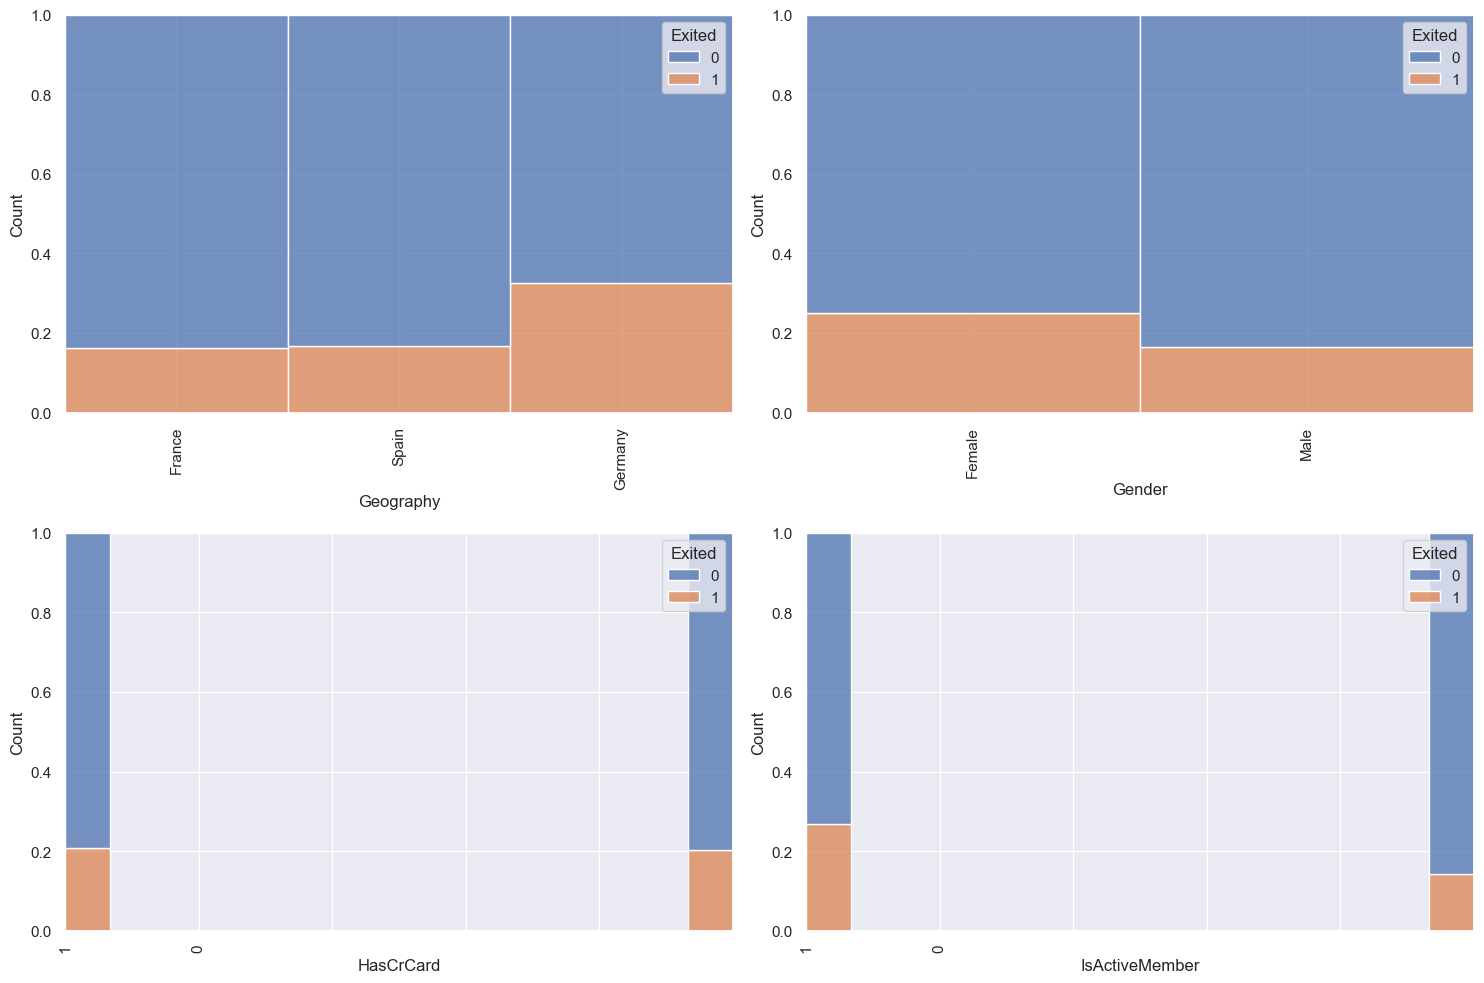

In [6]:
#Creating Warnings?
import warnings
warnings.filterwarnings('ignore')
#get list of categorical variables
cat_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

#Create fig with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

#create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Exited', data=df, ax=axs[i], multiple='fill', kde=False, element='bars')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

#adjust spacing between subplots
fig.tight_layout()

plt.show()

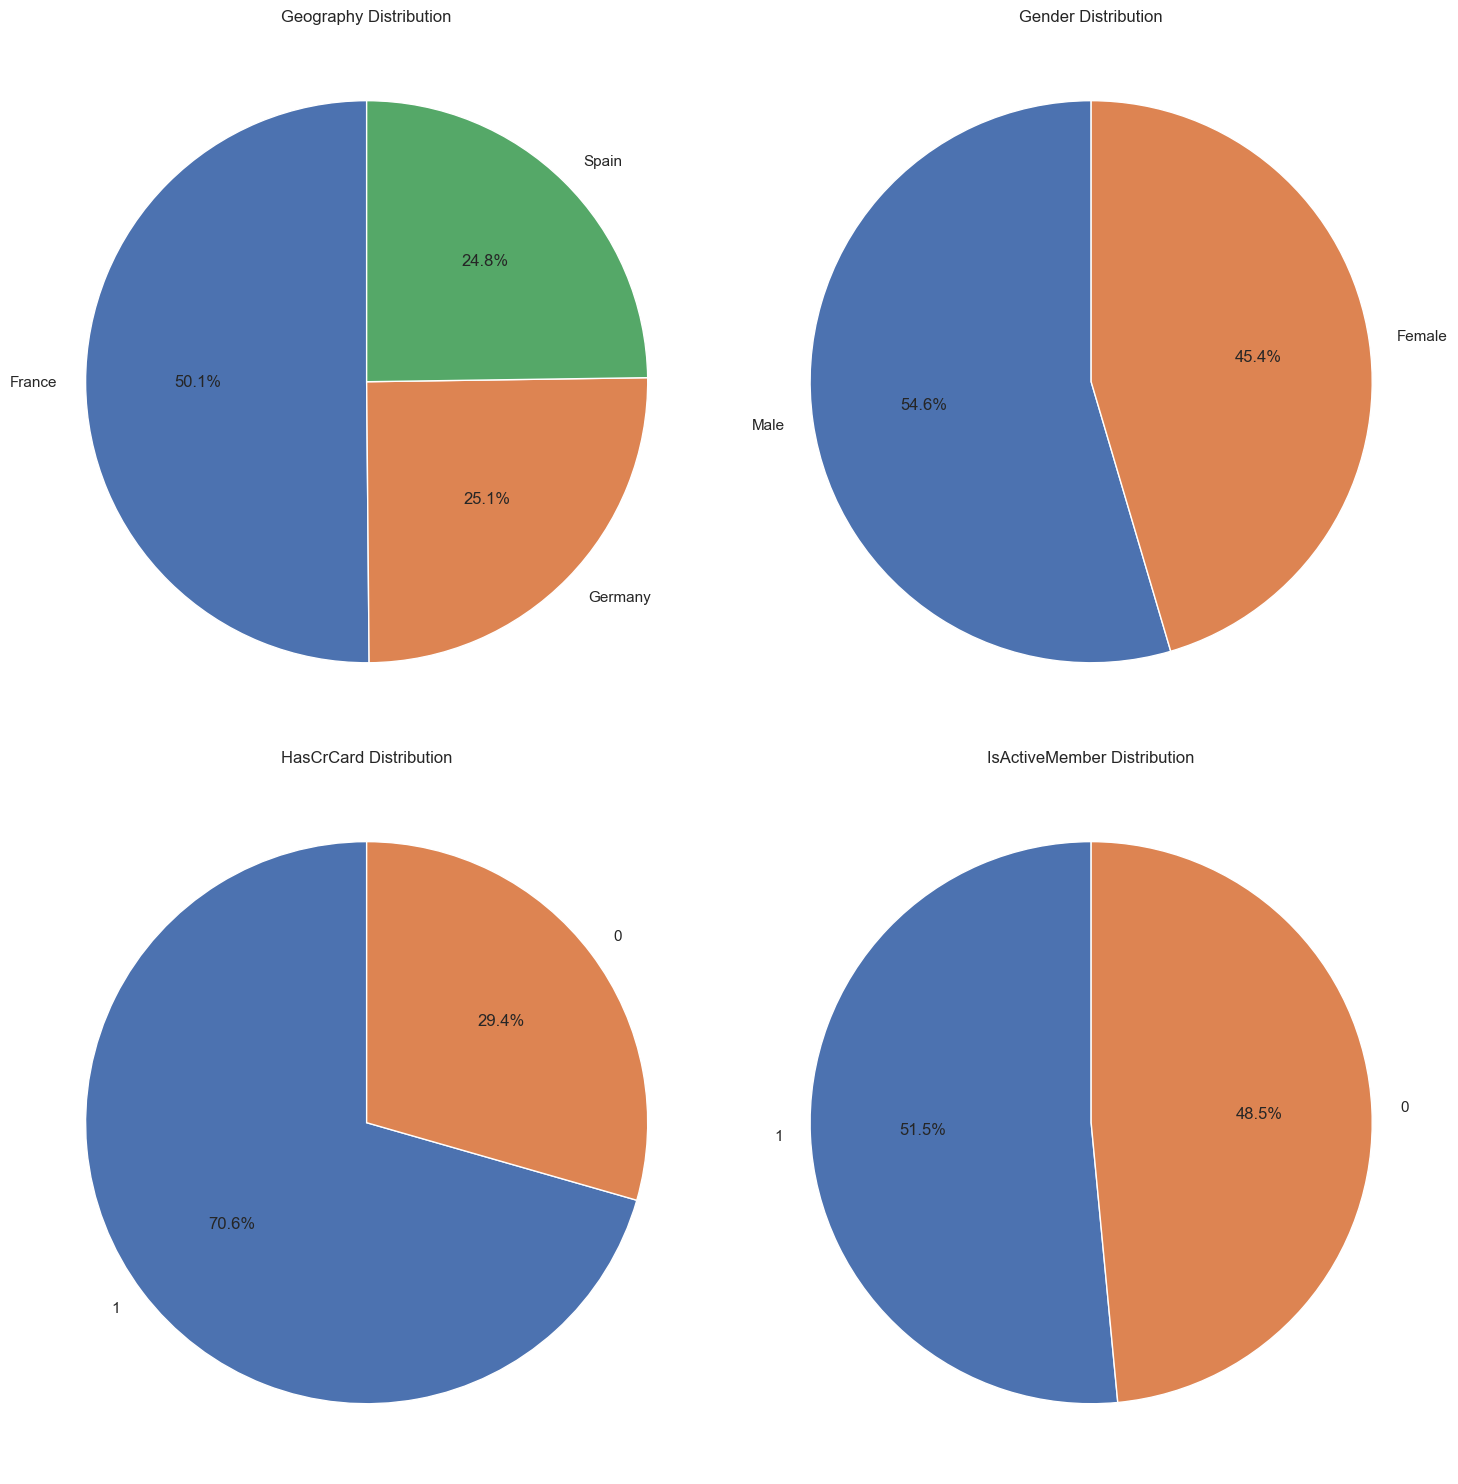

In [9]:
cat_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

#Create fig wand axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

#create piechart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        #count the number of occurences for each category
        cat_counts = df[var].value_counts()

        #create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        #set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

#adjust spacing between subplots
fig.tight_layout()

plt.show()

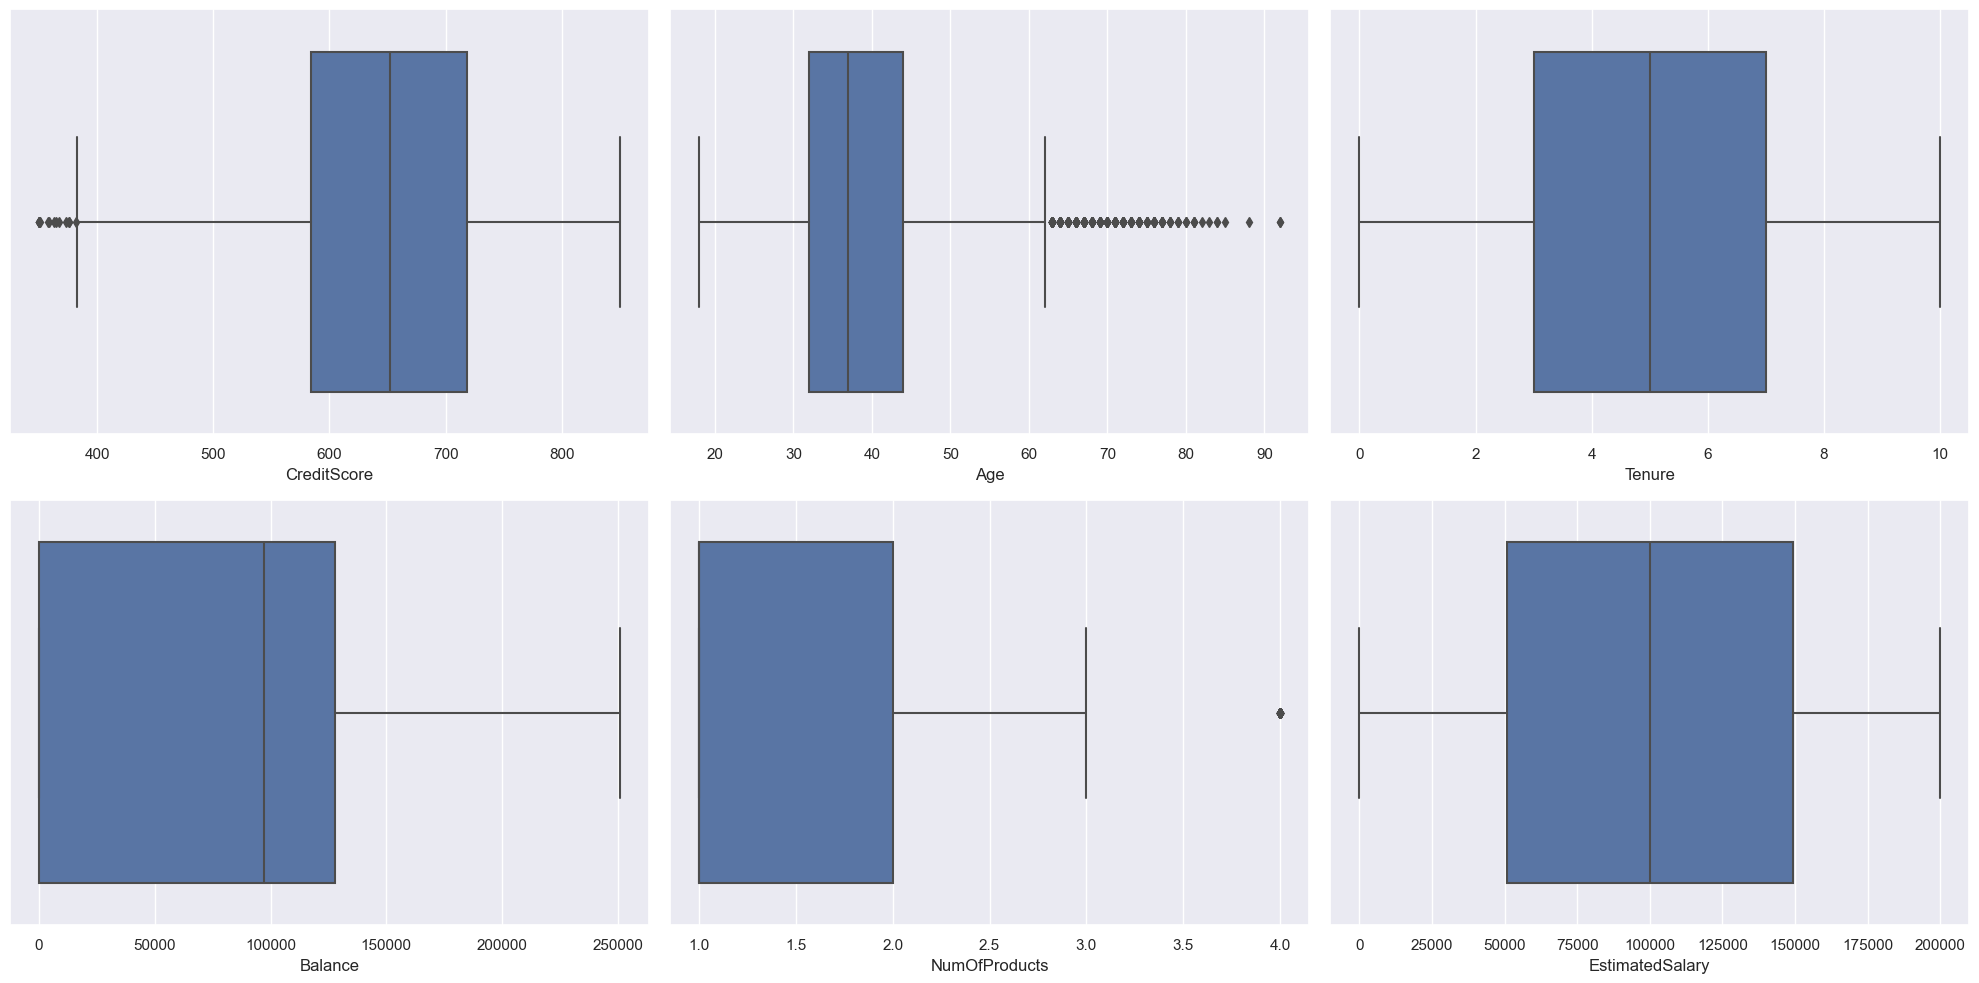

In [14]:
num_vars = ['CreditScore', 'Age', "Tenure", 'Balance',  'NumOfProducts', 'EstimatedSalary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

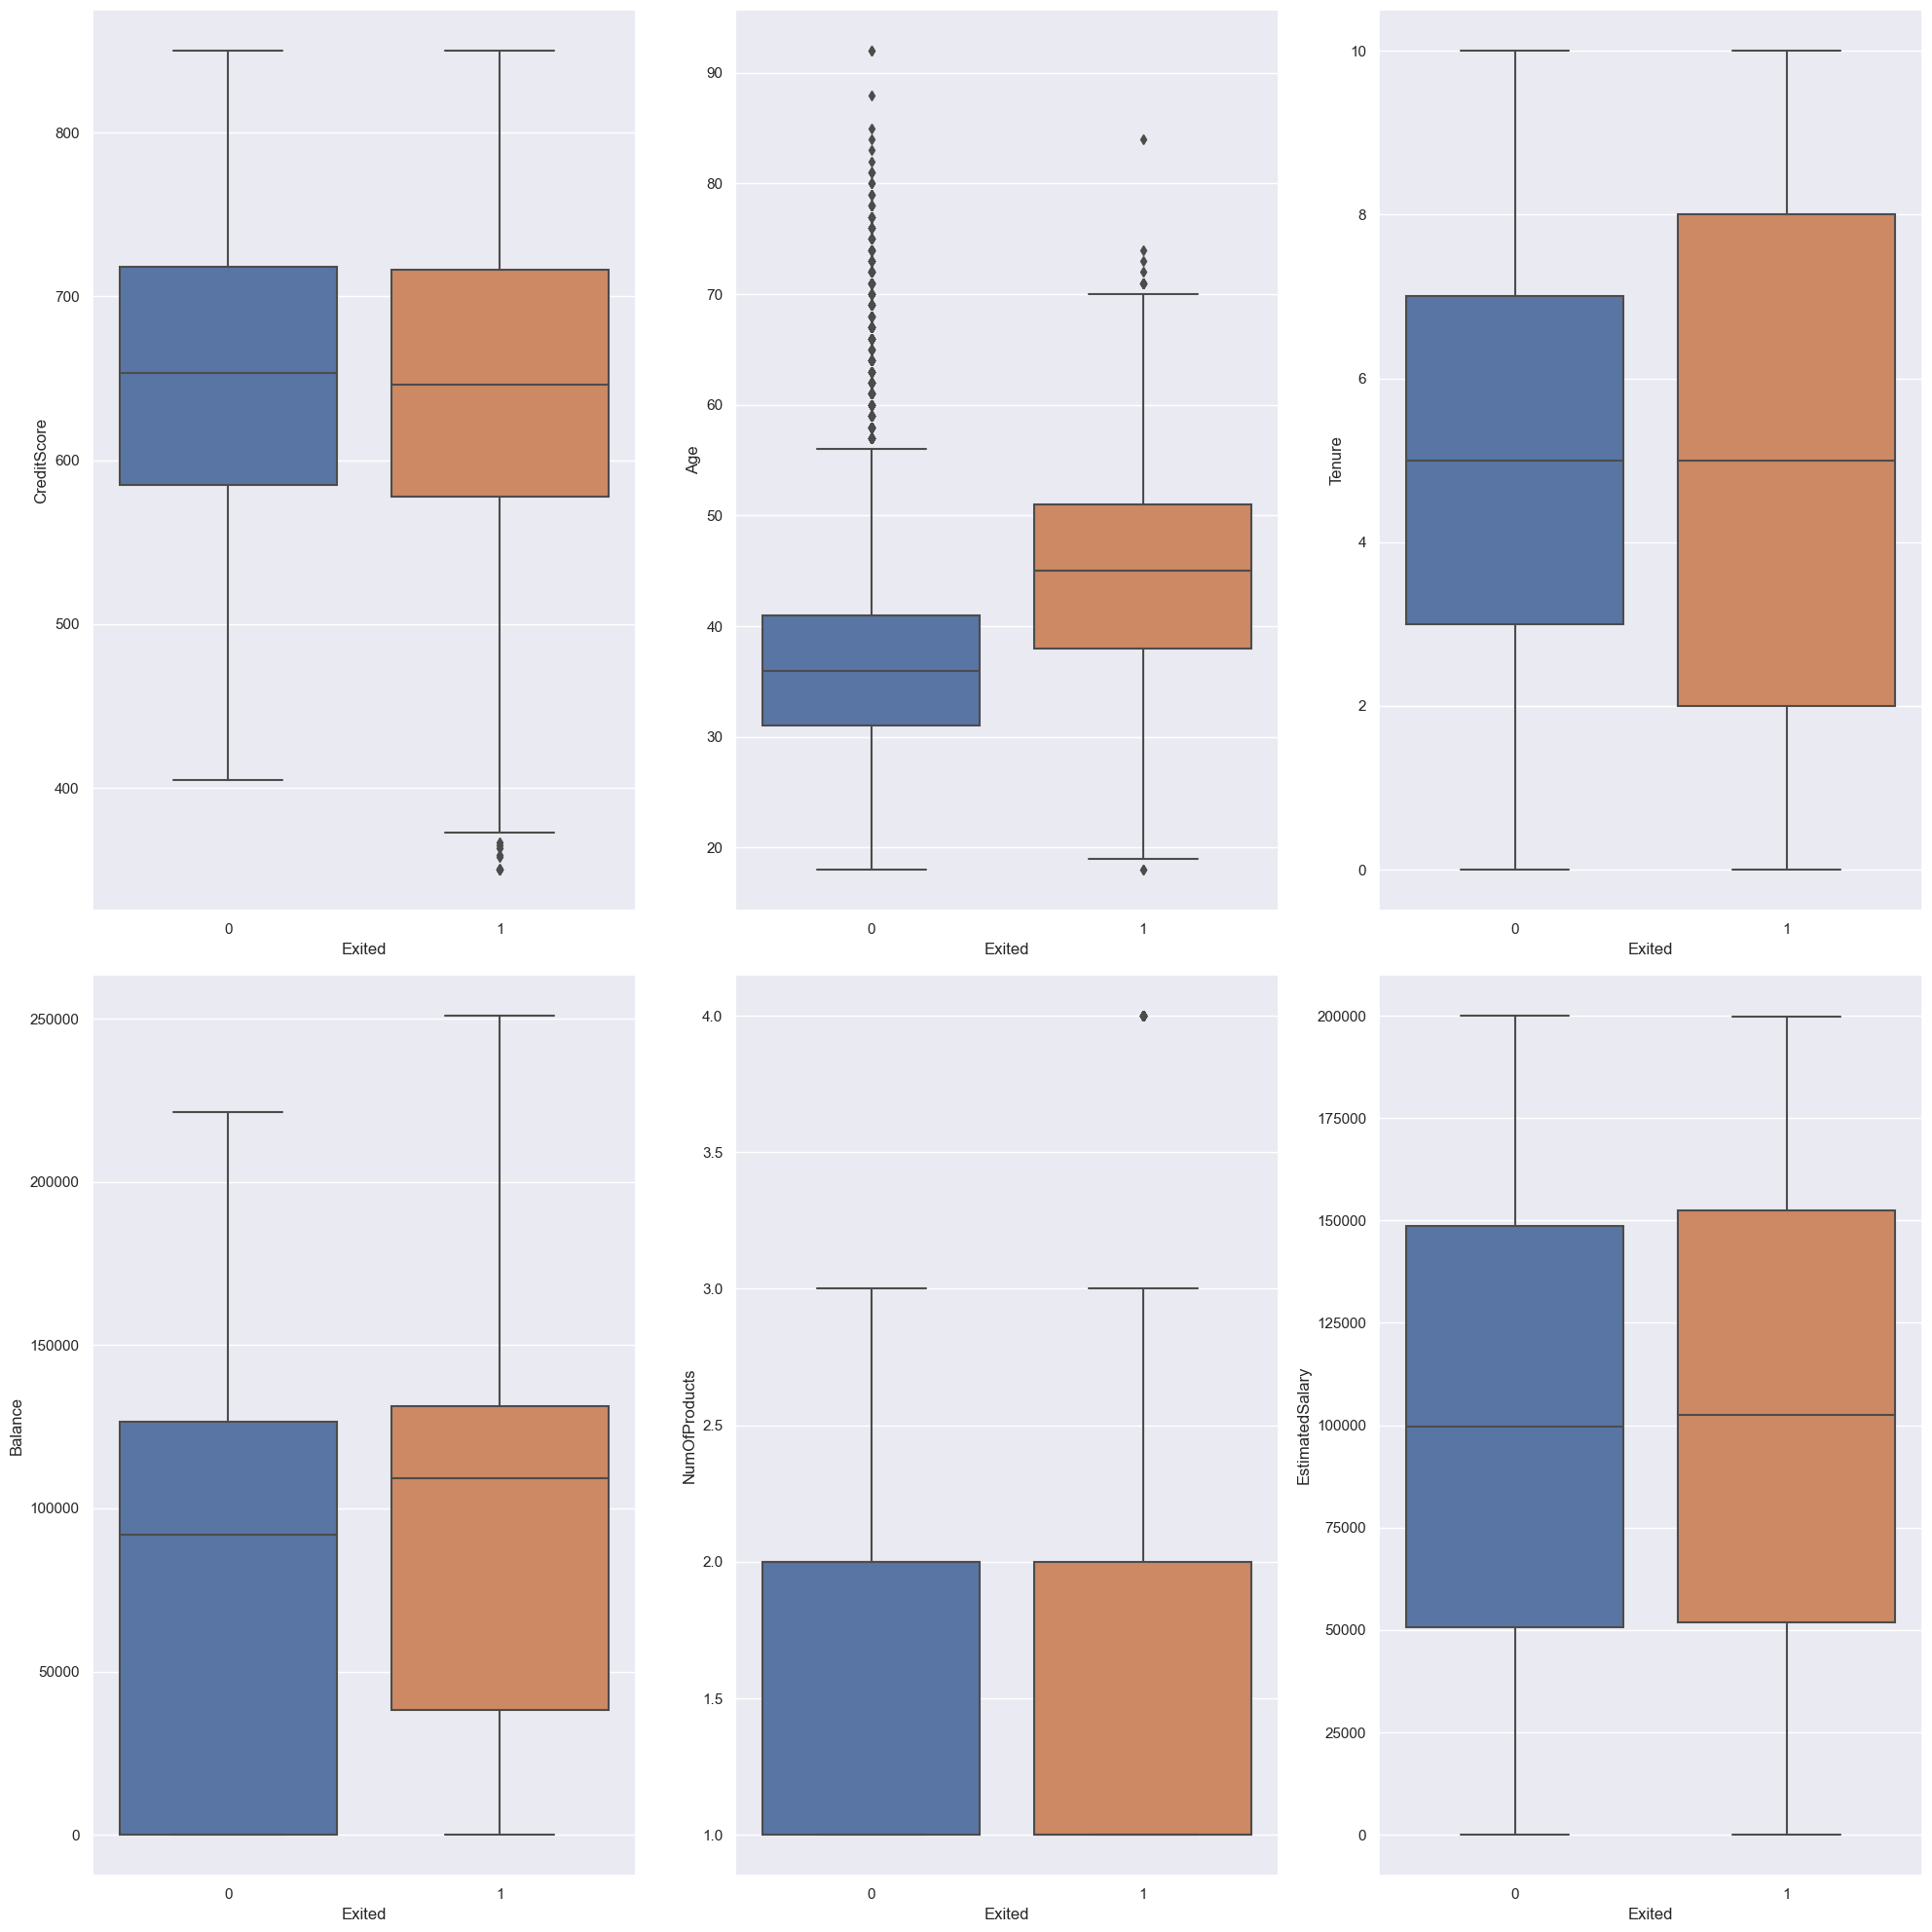

In [15]:
num_vars = ['CreditScore', 'Age', "Tenure", 'Balance',  'NumOfProducts', 'EstimatedSalary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Exited', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

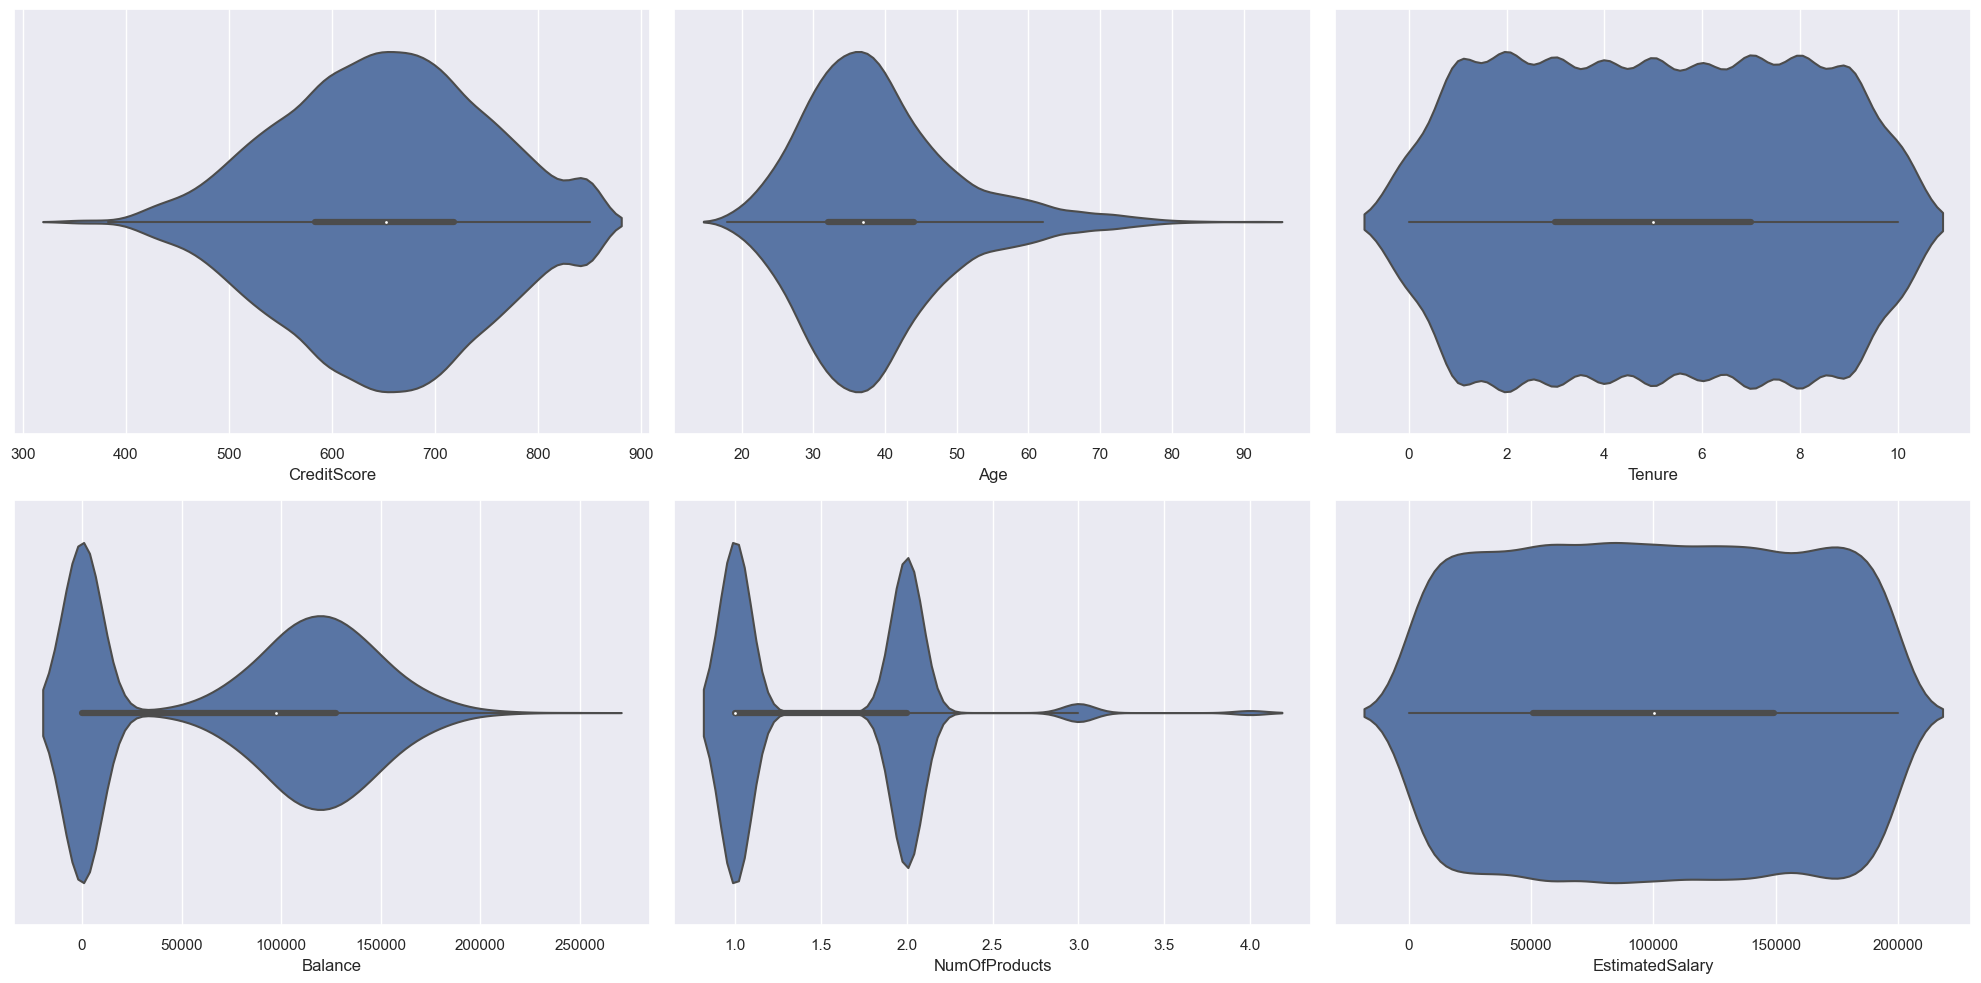

In [16]:
num_vars = ['CreditScore', 'Age', "Tenure", 'Balance',  'NumOfProducts', 'EstimatedSalary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

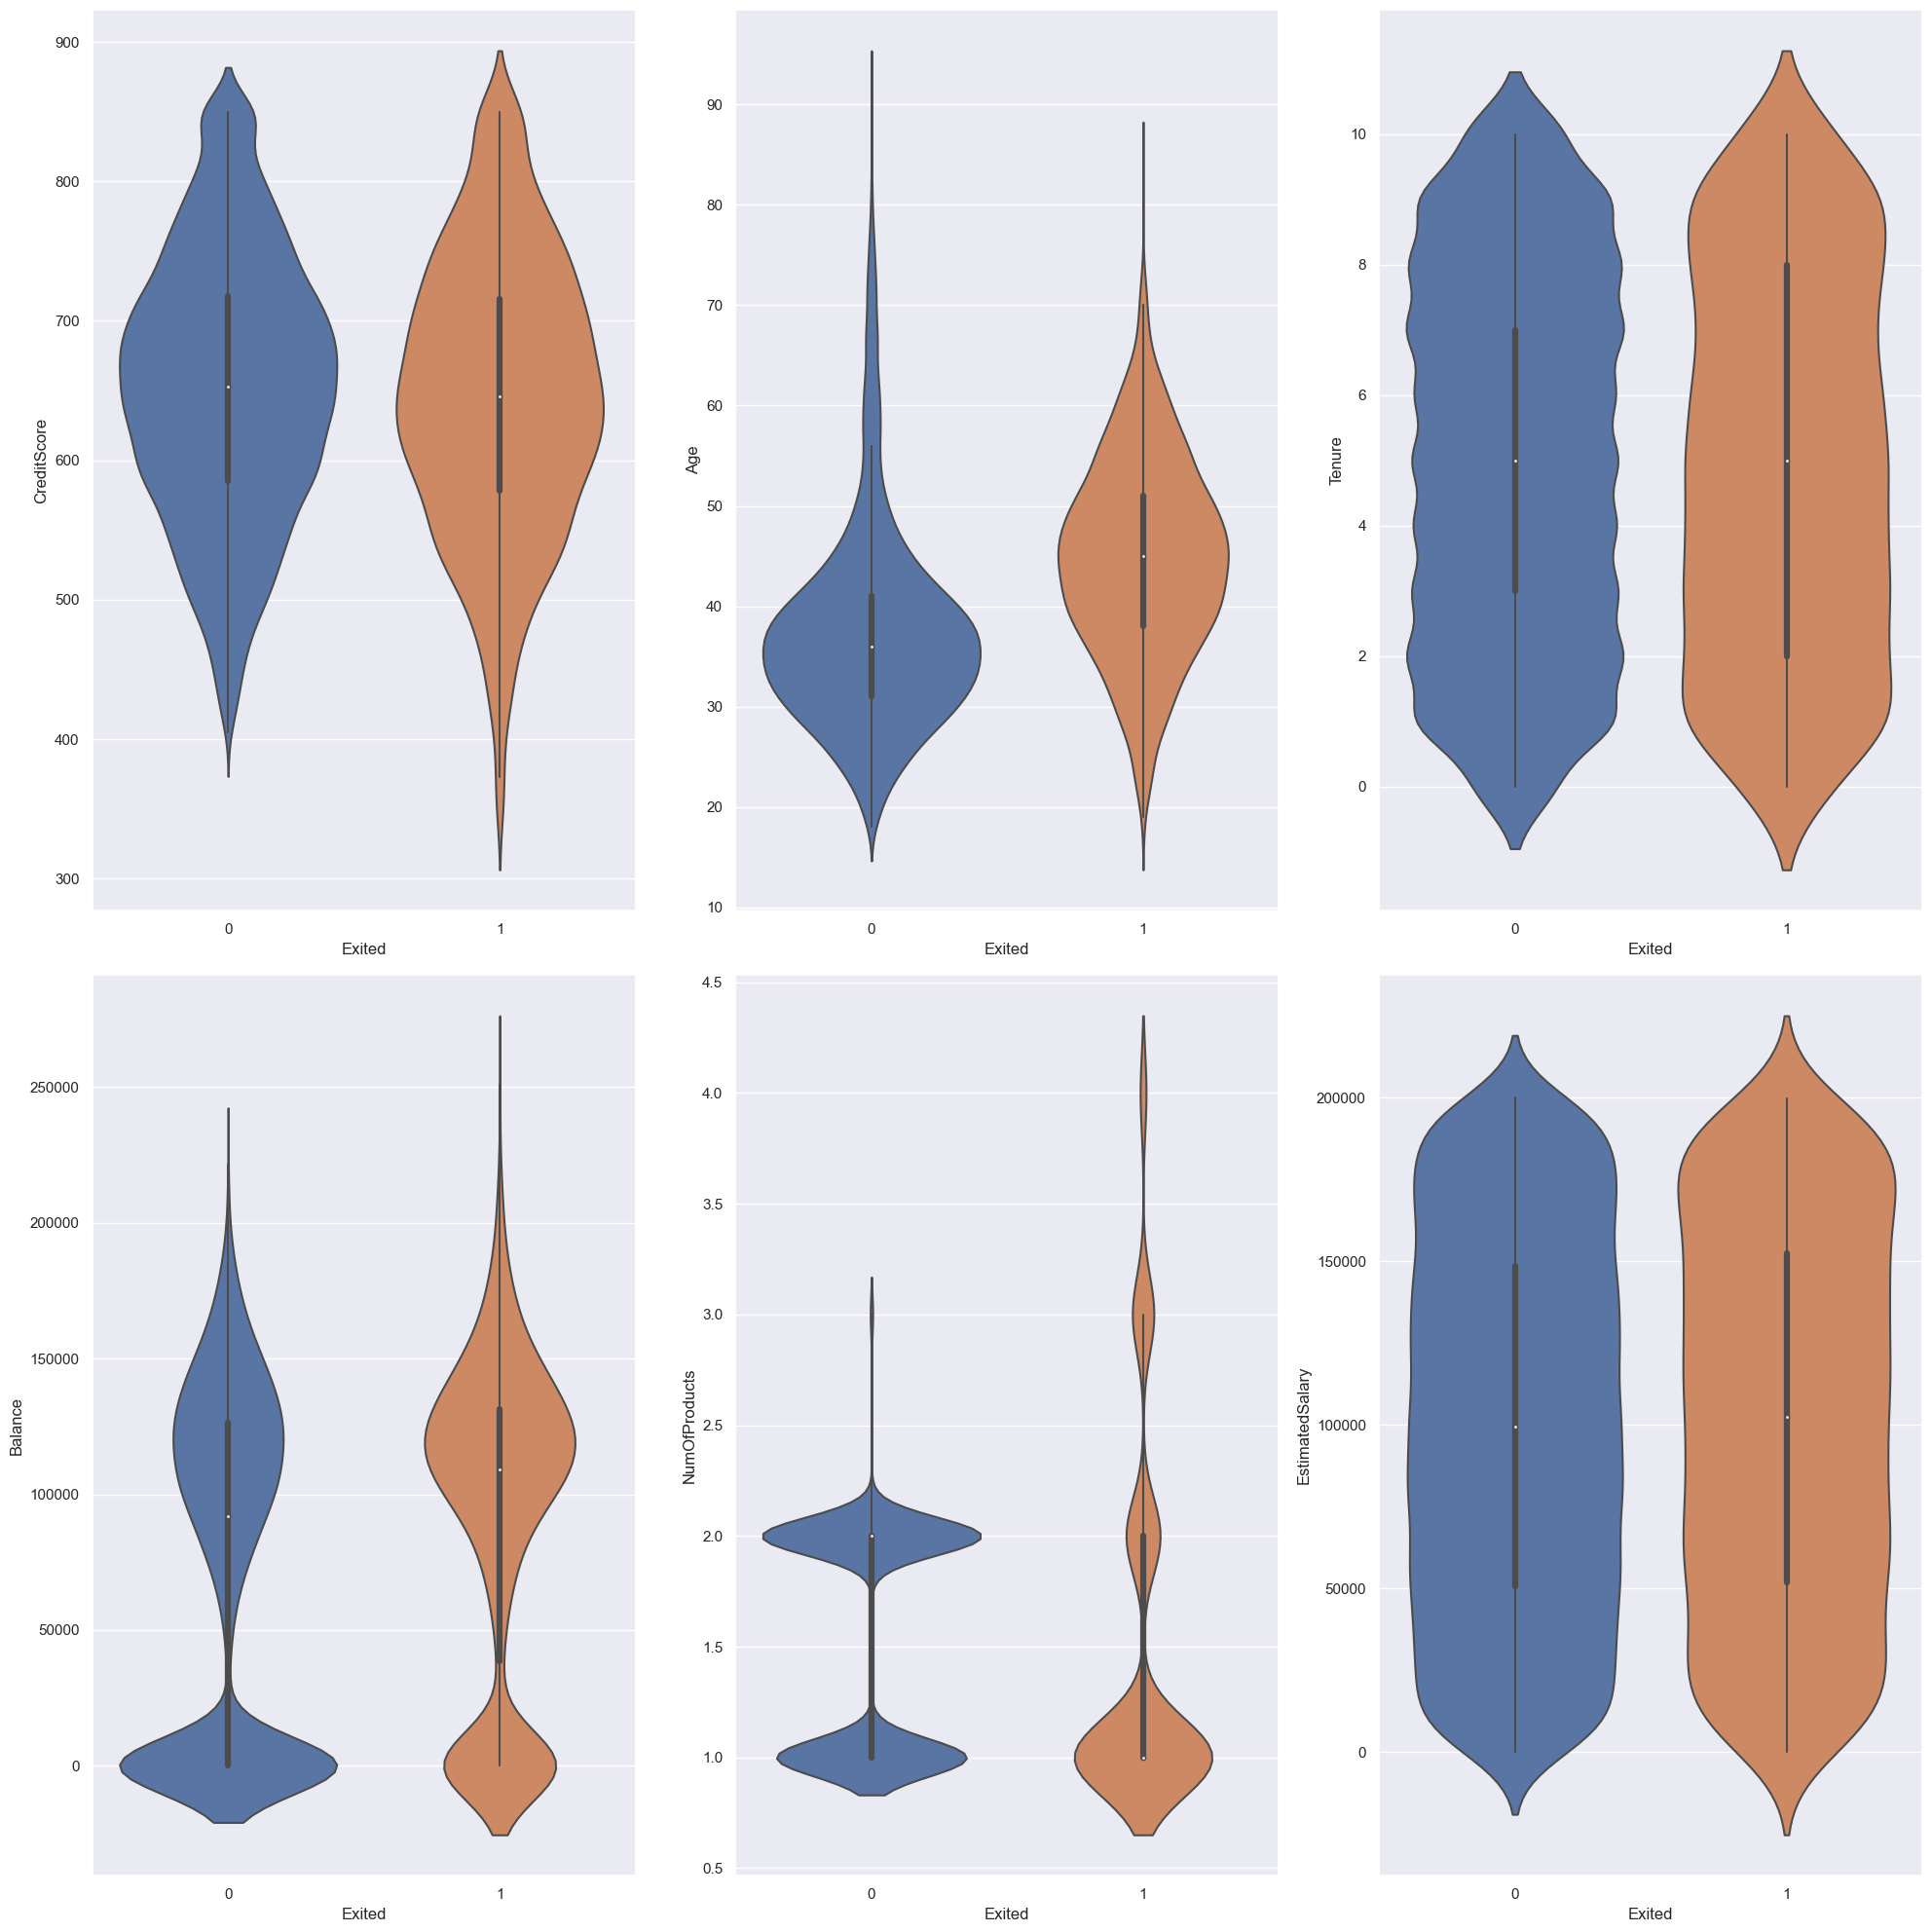

In [17]:
num_vars = ['CreditScore', 'Age', "Tenure", 'Balance',  'NumOfProducts', 'EstimatedSalary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, x='Exited', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

In [19]:
#Checking missing values   
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

Label Encoding for each Object datatype

In [22]:
#Loop over each column in the dataframe where dtype is "object"

for col in df.select_dtypes(include=['object']).columns:

    #print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [23]:
from sklearn import preprocessing

#Loop each column where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    #initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    #Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    #transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    #print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Geography: [0 2 1]
Gender: [0 1]


Correlation Heatmap

<Axes: >

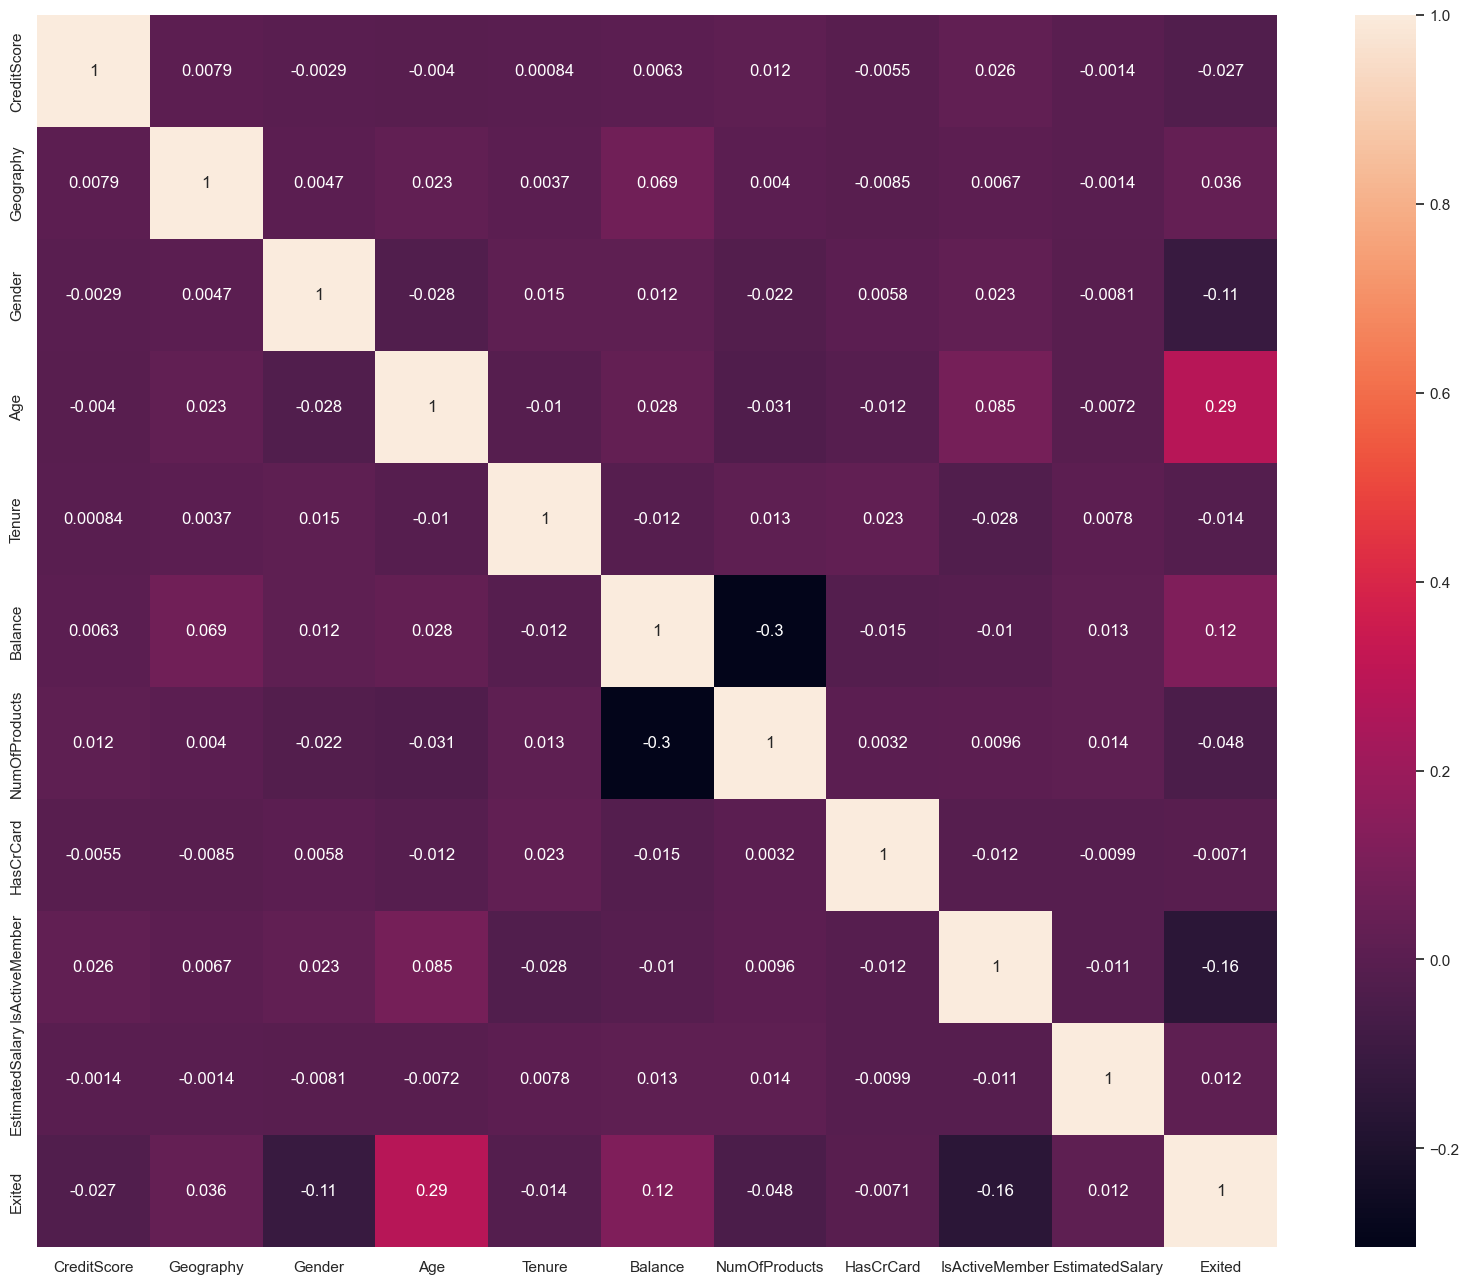

In [24]:
#cORRELATION hEATMAP (PRINT THE CORRELATION SCORE EACH VARIABLES)

plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='1.2g', annot=True)

Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
#select the features (X) and the target variable (Y)
X = df.drop('Exited', axis=1)
y = df['Exited']

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Remove the Outlier from train data using Z-Score

In [27]:
from scipy import stats

#define the columns for which you want to remoce outliers
select_columns = ['Age', 'NumOfProducts', 'CreditScore']

#Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[select_columns]))

#Set a threshhold value for outliers detection (.g., 3)
threshold = 3

#Find the indices of outliers based on the threshold
outliers_indices = np.where(z_scores > threshold)[0]

#Remove the outliers drom the training data
X_train = X_train.drop(X_train.index[outliers_indices])
y_train = y_train.drop(y_train.index[outliers_indices])

Decision three

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth' : [3, 4, 5, 6, 7, 8], 
    'min_samples_split' : [2, 3, 4], 
    'min_samples_leaf' : [1, 2, 3, 4],
    'random_state' : [0, 42]
}

#perform a grid search with cross-validation to find the nest hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Print the best hyperparameter
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [31]:
from sklearn.metrics import  accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score:", round(accuracy_score(y_test, y_pred)*100, 2), "%")

Accuracy Score: 84.25 %


In [33]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ', (f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ', (precision_score(y_test, y_pred, average='micro')))
print('Recal Score : ', (recall_score(y_test, y_pred, average='micro')))
print('Jaccard score : ', (jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ', (log_loss(y_test, y_pred)))

F-1 Score :  0.8425
Precision Score :  0.8425
Recal Score :  0.8425
Jaccard score :  0.7278617710583153
Log Loss :  5.676875408785952


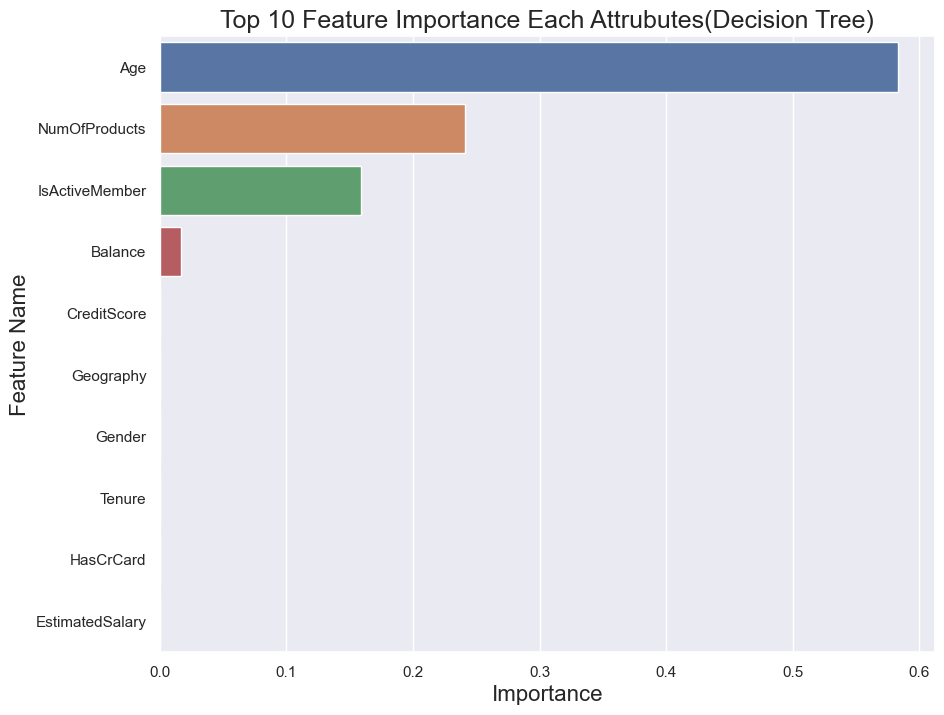

In [36]:
imp_df = pd.DataFrame({
    "Feature Name" : X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x= 'Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attrubutes(Decision Tree)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()